<a href="https://colab.research.google.com/github/invictus717/logistic-regression/blob/main/multi_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

8192/2194 [================================================================================================================] - 0s 0us/step
i: 0 ,Acc:0.230769, Loss: 1.176767
i: 30 ,Acc:0.987179, Loss: 0.258099
i: 60 ,Acc:0.987179, Loss: 0.156539
i: 90 ,Acc:0.987179, Loss: 0.119281
i: 120 ,Acc:0.987179, Loss: 0.099161


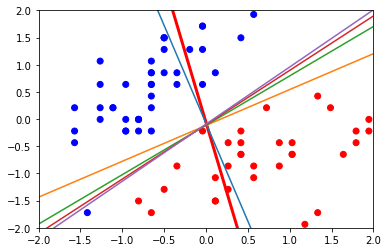

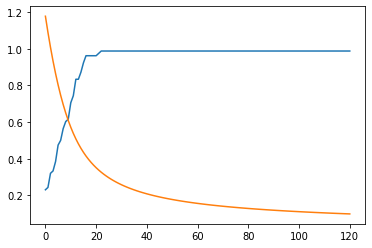

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

np.random.seed(612)
TRAIN_URL = "http://download.tensorflow.org/data/iris_training.csv"
train_path = tf.keras.utils.get_file(TRAIN_URL.split('/')[-1], TRAIN_URL)

iris_df = pd.read_csv(train_path, header=0)
iris_np = np.array(iris_df)
train_x = iris_np[:, 0:2]
train_y = iris_np[:, 4]
x_train = train_x[train_y < 2]
y_train = train_y[train_y < 2]

mns = MinMaxScaler(feature_range=(0, 1))
stds = StandardScaler()
x_train = stds.fit_transform(x_train)

W = tf.Variable(np.random.randn(3, 1), dtype=tf.float32)
cm_pt = mpl.colors.ListedColormap(["blue", "red"])
x_ = [-2, 2]
y_ = -(W[0] + W[1] * x_) / W[2]

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=cm_pt)
plt.plot(x_, y_, color='red', linewidth=3)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
lean_rate = 0.2
iter = 120
display_step = 30
x0_train = np.ones(len(x_train)).reshape(-1, 1)
X = tf.cast(tf.concat((x0_train, x_train), axis=1), tf.float32)
Y = tf.cast(y_train.reshape(-1, 1), tf.float32)

ce = []
acc = []
for i in range(0, iter + 1):
    with tf.GradientTape() as tape:
        PRED = 1 / (1 + tf.exp(-tf.matmul(X, W)))
        Loss = -tf.reduce_mean(Y * tf.math.log(PRED) + (1 - Y) * tf.math.log(1 - PRED))
    accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.where(PRED.numpy() < 0.5, 0., 1), Y), tf.float32))
    ce.append(Loss)
    acc.append(accuracy)

    dL_dW = tape.gradient(Loss, W)
    W.assign_sub(lean_rate * dL_dW)

    if i % display_step == 0:
        print("i: %i ,Acc:%f, Loss: %f" % (i, accuracy, Loss))
        y_ = -(W[0] + W[1] * x_) / W[2]
        plt.plot(x_, y_)
plt.figure()
plt.plot(acc)
plt.plot(ce)
plt.show()


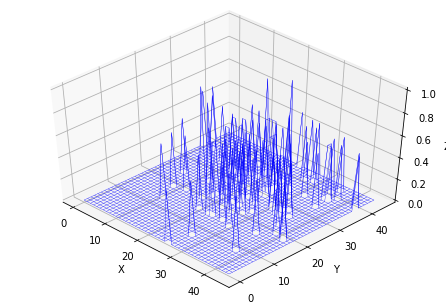

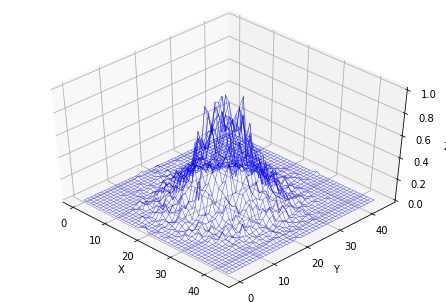

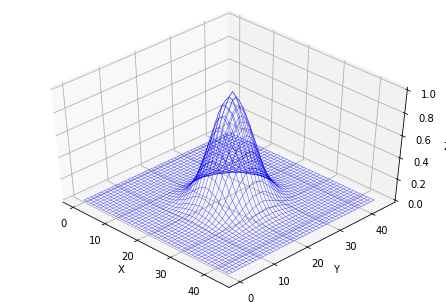

In [3]:
import numpy as np
from scipy import stats
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def draw (sample_num):
    d = np.random.randn(sample_num,2)
    N = 45
    density= np.histogramdd(d, bins=[N, N])[0]
    density /= density.max()
    x = y = np.arange(N)
    X,Y = np.meshgrid(x, y)
    fig = plt.figure(num="Sample_num:{}".format(sample_num))
    ax= Axes3D(fig)
    ax.view_init(azim=-45,elev=45)
    ax.plot_wireframe(X, Y, density, color='b',linewidth=0.32)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()
if __name__=='__main__':
    draw(100)
    draw(10000)
    draw(1000000)

In [6]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
print(gpus)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [8]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_virtual_device_configuration(
    gpus[0],
    [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2048),
     tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2048)])

In [9]:
gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
print(gpus)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [10]:
import tensorflow as tf
import tensorflow_datasets as tfds
 
num_epochs = 5
batch_size_per_replica = 64
learning_rate = 0.001
 
strategy = tf.distribute.MirroredStrategy()
print('Number of devices: %d' % strategy.num_replicas_in_sync)  # 输出设备数量
batch_size = batch_size_per_replica * strategy.num_replicas_in_sync
 
# 载入数据集并预处理
def resize(image, label):
    image = tf.image.resize(image, [224, 224]) / 255.0
    return image, label
 
# 当as_supervised为True时，返回image和label两个键值
dataset = tfds.load("cats_vs_dogs", split=tfds.Split.TRAIN, as_supervised=True)
dataset = dataset.map(resize).shuffle(1024).batch(batch_size)
 
with strategy.scope():
    model = tf.keras.applications.MobileNetV2()
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss=tf.keras.losses.sparse_categorical_crossentropy,
        metrics=[tf.keras.metrics.sparse_categorical_accuracy]
    )
 
model.fit(dataset, epochs=num_epochs)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1')
Number of devices: 2


Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteRPRCCM/cats_vs_dogs-train.tfrecord


Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


14540800/14536120 [==============================] - 0s 0us/step
Epoch 1/5
Instructions for updating:
Use `tf.data.Iterator.get_next_as_optional()` instead.


Instructions for updating:
Use `tf.data.Iterator.get_next_as_optional()` instead.


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1').


ResourceExhaustedError: ignored